<a href="https://colab.research.google.com/github/Rakhshindaa/Sentiment-analysis-on-text-data-/blob/main/Sentiment_Analysis_on_twitter_data_for_US_election_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install wordcloud
!pip install textblob

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

# avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trump = pd.read_csv("donaldtrump.csv", lineterminator='\n', quoting=3, on_bad_lines='skip') # Added quoting and on_bad_lines parameters
print(trump.head(3))

                 created_at               tweet_id  \
0       2020-10-15 00:00:01  1.316529221557252e+18   
1                         ⠀                    NaN   
2  🌐https://t.co/qhIWpIUXsT                    NaN   

                                               tweet likes retweet_count  \
0  "#Elecciones2020 | En #Florida: #JoeBiden dice...   NaN           NaN   
1                                                NaN   NaN           NaN   
2                                                NaN   NaN           NaN   

  source user_id user_name user_screen_name user_description  ...  \
0    NaN     NaN       NaN              NaN              NaN  ...   
1    NaN     NaN       NaN              NaN              NaN  ...   
2    NaN     NaN       NaN              NaN              NaN  ...   

  user_followers_count user_location  lat long city country continent state  \
0                  NaN           NaN  NaN  NaN  NaN     NaN       NaN   NaN   
1                  NaN           NaN  NaN  

In [ ]:
# Display all the columns in the DataFrame
print(trump.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [ ]:
biden = pd.read_csv("joebiden.csv", quoting=3, lineterminator='\n', on_bad_lines='skip')
print(biden.head(1))

            created_at               tweet_id  \
0  2020-10-15 00:00:01  1.316529221557252e+18   

                                               tweet likes retweet_count  \
0  "#Elecciones2020 | En #Florida: #JoeBiden dice...   NaN           NaN   

  source user_id user_name user_screen_name user_description  ...  \
0    NaN     NaN       NaN              NaN              NaN  ...   

  user_followers_count user_location  lat long city country continent state  \
0                  NaN           NaN  NaN  NaN  NaN     NaN       NaN   NaN   

  state_code collected_at  
0        NaN          NaN  

[1 rows x 21 columns]


In [ ]:
print(trump.shape)
print(biden.shape)

(94674, 21)
(102909, 21)


In [ ]:
# Getting trump dataset information
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94674 entries, 0 to 94673
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            94670 non-null  object
 1   tweet_id              58837 non-null  object
 2   tweet                 56092 non-null  object
 3   likes                 38784 non-null  object
 4   retweet_count         33770 non-null  object
 5   source                32247 non-null  object
 6   user_id               30717 non-null  object
 7   user_name             28942 non-null  object
 8   user_screen_name      27626 non-null  object
 9   user_description      24437 non-null  object
 10  user_join_date        21313 non-null  object
 11  user_followers_count  21978 non-null  object
 12  user_location         12649 non-null  object
 13  lat                   7235 non-null   object
 14  long                  6655 non-null   object
 15  city                  5567 non-null 

In [ ]:
# Getting biden dataset information
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102909 entries, 0 to 102908
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   created_at            102900 non-null  object
 1   tweet_id              66360 non-null   object
 2   tweet                 63575 non-null   object
 3   likes                 43891 non-null   object
 4   retweet_count         38626 non-null   object
 5   source                37008 non-null   object
 6   user_id               35360 non-null   object
 7   user_name             33169 non-null   object
 8   user_screen_name      31984 non-null   object
 9   user_description      27609 non-null   object
 10  user_join_date        24620 non-null   object
 11  user_followers_count  26042 non-null   object
 12  user_location         14461 non-null   object
 13  lat                   8397 non-null    object
 14  long                  8018 non-null    object
 15  city             

In [ ]:
# creating a new column 'candidate' to differentiate between tweets of Trump and Biden
trump['candidate'] = 'trump'
biden['candidate'] = 'biden'

# combining the dataframes
data = pd.concat([trump, biden])

# FInal data shape
print('Final Data Shape :', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (197583, 22)

First 2 rows:
                 created_at               tweet_id  \
0       2020-10-15 00:00:01  1.316529221557252e+18   
1                         ⠀                    NaN   
2  🌐https://t.co/qhIWpIUXsT                    NaN   

                                               tweet likes retweet_count  \
0  "#Elecciones2020 | En #Florida: #JoeBiden dice...   NaN           NaN   
1                                                NaN   NaN           NaN   
2                                                NaN   NaN           NaN   

  source user_id user_name user_screen_name user_description  ...  \
0    NaN     NaN       NaN              NaN              NaN  ...   
1    NaN     NaN       NaN              NaN              NaN  ...   
2    NaN     NaN       NaN              NaN              NaN  ...   

  user_location  lat long city country continent state state_code  \
0           NaN  NaN  NaN  NaN     NaN       NaN   NaN        NaN   
1           NaN 

In [ ]:
# dropping null values if they exist
data.dropna(inplace=True)

In [ ]:
data['country'].value_counts()

,count
country,
United States of America,1532
The Netherlands,153
United Kingdom,122
India,96
Canada,94
Germany,72
Australia,50
France,34
Ireland,13


In [ ]:
data['country'] = data['country'].replace({'United States of America': "US",'United States': "US"})

In [ ]:
print(data.groupby('candidate')['tweet'].count())

candidate
biden    1147
trump    1123
Name: tweet, dtype: int64


In [ ]:
# Group the data by 'candidate'
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()
print(data.groupby('candidate')['tweet'].count())
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
             color_discrete_map={'Trump': 'pink', 'Biden': 'blue'},
             labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'},
             title='Tweets for Candidates')
fig.show()

candidate
biden    1147
trump    1123
Name: tweet, dtype: int64


In [ ]:
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).reset_index().head(10)
fig = px.bar(top10countries, x='country', y='tweet',title='Top10 Countrywise tweets Counts')
fig.show()


In [ ]:
tweet_df = data.groupby(['country', 'candidate'])['tweet'].count().reset_index()
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)]
fig = px.bar(tweeters, x='country', y='tweet', color='candidate',
             labels={'country': 'Country', 'tweet': 'Number of Tweets','candidate': 'Candidate'},
             title='Tweet Counts for Each Candidate in the Top 10 Countries',
             barmode='stack')
fig.show()

In [ ]:
def clean(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text))
    # Convert text to lowercase
    text = text.lower()
    # Replace anything other than alphabets a-z with a space
    text = re.sub('[^a-z]', ' ', text)
    # Split the text into single words
    text = text.split()
    # Initialize WordNetLemmatizer
    lm = WordNetLemmatizer()
    # Lemmatize words and remove stopwords
    text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    # Join the words back into a sentence
    text = ' '.join(word for word in text)
    return text

In [ ]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
trump_tweets = data[data['candidate'] == 'trump']
# taking only U.S. country data
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                    tweet
9                                     1.0
170                                   1.0
172  @JoeBiden #donaldtrump 4 more years!
273                                   1.0
376                                   0.0


In [ ]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

                                    tweet                  cleantext
9                                     1.0                           
170                                   1.0                           
172  @JoeBiden #donaldtrump 4 more years!  joebiden donaldtrump year
273                                   1.0                           
376                                   0.0                           


In [ ]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [ ]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [ ]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
9,1.0,,0.0,0.0,neutral
170,1.0,,0.0,0.0,neutral
172,@JoeBiden #donaldtrump 4 more years!,joebiden donaldtrump year,0.0,0.0,neutral
273,1.0,,0.0,0.0,neutral
376,0.0,,0.0,0.0,neutral


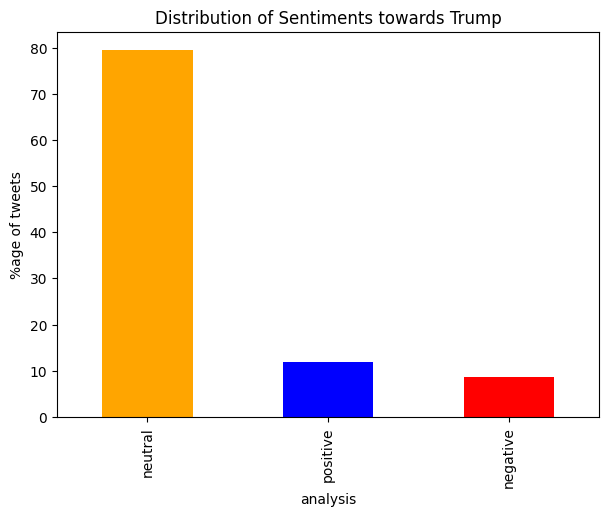

In [ ]:
colors = ['orange', 'blue', 'red']
plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Trump")
plt.show()

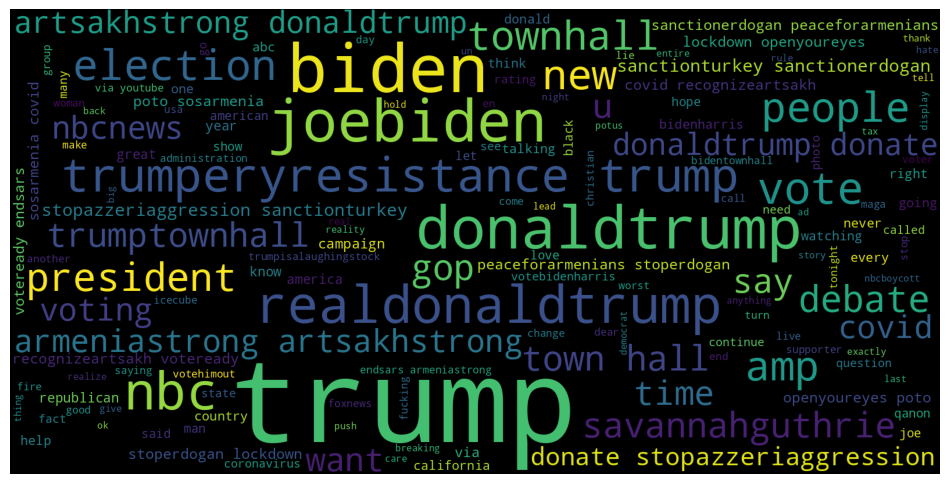

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
                        width=1600, height=800, max_words=150, max_font_size=200,
                        colormap="viridis").generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(trump_tweets['cleantext'][:5000])

In [ ]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
62,1.0
158,0.0
515,382.0
570,0.0
573,watching the legacy media and big tech work in...
...,...
101957,@chipfranklin Already voted! #Biden
102397,0.0
102644,0.0
102687,@thehill The blue wave is coming! #VoteBlueDow...


In [ ]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
62,1.0,
158,0.0,
515,382.0,
570,0.0,
573,watching the legacy media and big tech work in...,watching legacy medium big tech work concert p...


In [ ]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
62,1.0,,0.000,0.0,neutral
158,0.0,,0.000,0.0,neutral
515,382.0,,0.000,0.0,neutral
570,0.0,,0.000,0.0,neutral
573,watching the legacy media and big tech work in...,watching legacy medium big tech work concert p...,0.075,0.0,neutral


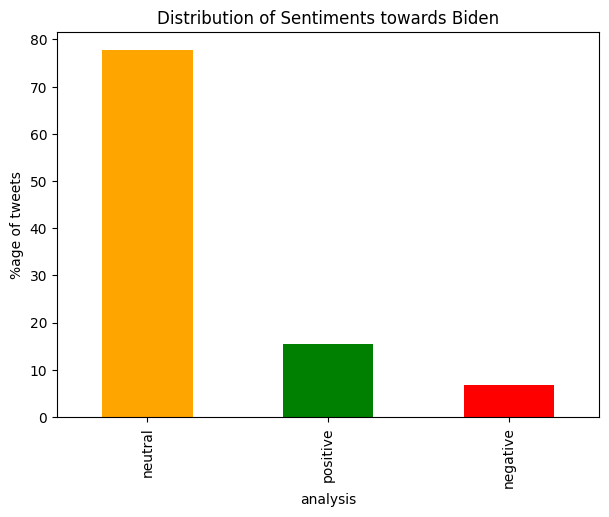

In [ ]:
colors = ['orange', 'green', 'red']
plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

In [ ]:
trump_tweets.analysis.value_counts(normalize=True)*100

,proportion
analysis,
neutral,79.470199
positive,11.920530
negative,8.609272


In [ ]:
biden_tweets.analysis.value_counts(normalize=True)*100

,proportion
analysis,
neutral,77.734878
positive,15.444015
negative,6.821107


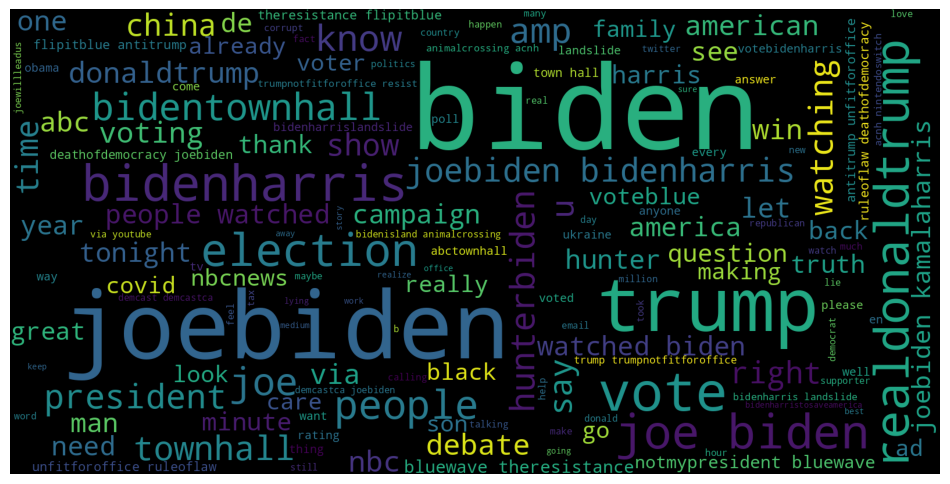

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
                        width=1600, height=800, max_words=150, max_font_size=200,
                        colormap="viridis").generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(biden_tweets['cleantext'][:5000])

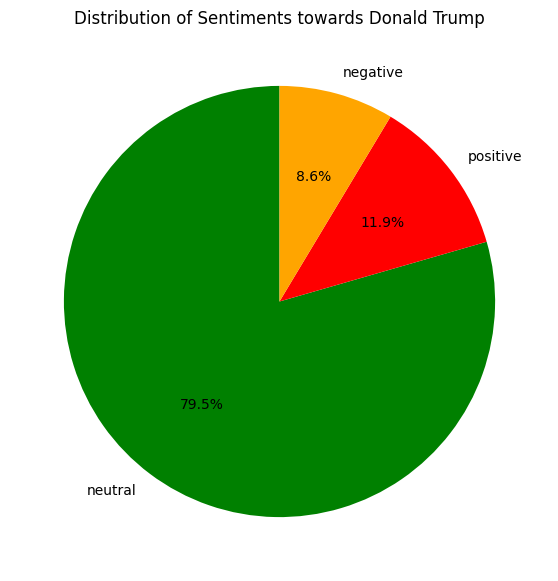

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = trump_tweets.analysis.value_counts(normalize=True) * 100
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'orange'])
plt.title("Distribution of Sentiments towards Donald Trump")
plt.show()

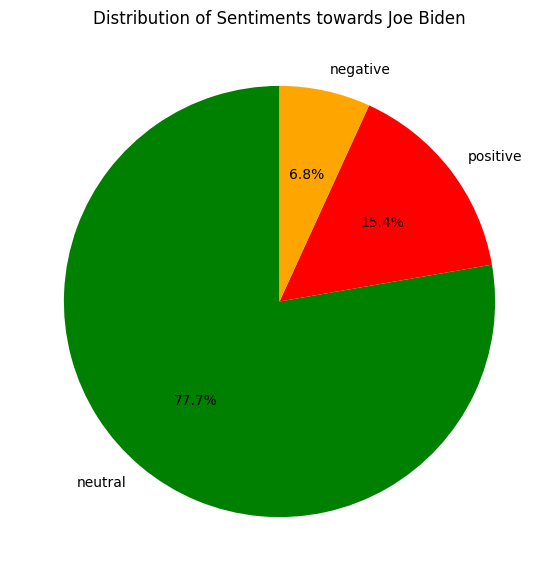

In [ ]:
sentiment_counts = biden_tweets.analysis.value_counts(normalize=True) * 100
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'orange'])
plt.title("Distribution of Sentiments towards Joe Biden")
plt.show()